# INTELIGENCIA ARTIFICIAL PRÁCTICA2: MACHINE LEARNING

Realizado por: **Rubén Ballesteros Jiménez, 78223104N; Eduardo Bonnín Narváez, 43464491B**

## ENUNCIADO

El objetivo principal de esta práctica de Machine Learning es aplicar y evaluar modelos de aprendizaje automático para reconocer dígitos escritos a mano. Nosotros, nos centraremos en las dificultades C y B.  En la dificultad C, exploraremos el uso de varios modelos, como regresión logística, perceptrón, árboles de decisión y bosques aleatorios, para comparar su rendimiento en el conjunto de datos de dígitos. En la dificultad B, profundizaremos en el ajuste y la validación de modelos utilizando técnicas como la validación cruzada k-fold mediante GridSearch, para mejorar la precisión y fiabilidad de las predicciones.

## IMPORTACIONES NECESARIAS

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## DATASET

Realizamos la carga del dataset

In [2]:
digits = load_digits()

El siguiente print muestra la forma de los datos. Nos encontramos con un conjunto de datos que contiene 1797 imágenes, cada una con 64 valores (vector de 64 píxeles que corresponden a los valores de una imagen de 8x8).

In [3]:
print(digits.data.shape)

(1797, 64)


Continuamos visualizando un ejemplo de los datos.

<Figure size 640x480 with 0 Axes>

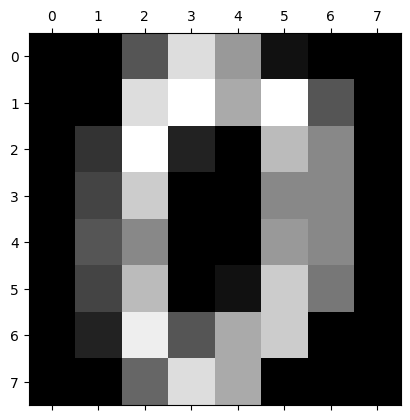

In [4]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

Y hacemos la correspondiente división entre train y test. Fijamos el test size a 0.2 (20%) para garantizar que haya suficientes datos para evaluar adecuadamente el rendimiento del modelo mientras se reserva la mayoría de los datos para el entrenamiento. Cabe mencionar que se usará el parámetro random state fijado a 42 en todo el documento.

In [5]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## DIFICULTAD C
Para la dificultad C, realizaremos una comparación de rendimiento entre los siguientes tres modelos: el regresor logístico, el perceptrón, el árbol de decisión y el bosque aleatorio. La comparación de modelos se basará en el rendimiento de cada uno de ellos en el conjunto de prueba seleccionado, lo cual se verá detalladamente mediante el reporte de clasificación, y,de una forma más visual, en la matriz de confusión. Posteriormente analizaremos qué modelo muestra un mejor desempeño y por qué.

### PERCEPTRON
Creación y entrenamiento del modelo, con su correspondiente predicción.

In [6]:
perceptron = linear_model.Perceptron(random_state=42)
perceptron.fit(X_train, y_train);
y_pred = perceptron.predict(X_test)

#### RENDIMIENTO

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.78      1.00      0.88        28
           2       0.97      0.94      0.95        33
           3       1.00      0.94      0.97        34
           4       1.00      0.98      0.99        46
           5       0.98      0.89      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.93      0.93      0.93        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



El informe de clasificación muestra un rendimiento general muy bueno del Perceptrón, con una precisión global del 95%. Sin embargo, hay algunas diferencias en el rendimiento entre las clases. La clase 1 tiene la precisión más baja (78%), aunque tiene un recall perfecto, lo que indica que todos los '1' se han identificado correctamente, aunque ha habido algunos otros dígitos identificados también como '1'. Las clases 0, 3, 4 y 7 tienen un rendimiento alto y la clase 5 tiene un recall más bajo (89%).

#### MATRIZ DE CONFUSIÓN

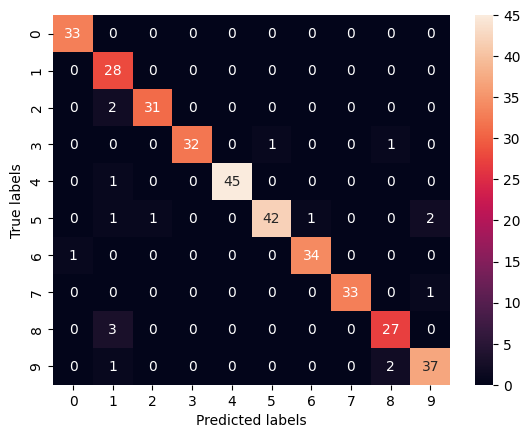

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Los valores en la diagonal principal (de arriba a la izquierda a abajo a la derecha) representan el número de predicciones correctas para cada dígito real. Por ejemplo, el modelo predijo correctamente el dígito '0' 33 veces, mientras que el dígito '1' fue predicho correctamente 28 veces.

Los valores fuera de la diagonal indican confusiones entre dígitos. Por ejemplo, el dígito '2' fue confundido con el dígito '8' en 3 ocasiones. Del mismo modo, el dígito '5' se confundió con el dígito '9' dos veces y con el '8' una vez.

Esta matriz sugiere que el modelo tiene un rendimiento bastante bueno en general, con algunas confusiones poco notables entre clases.

### REGRESOR LOGÍSTICO
Creación y entrenamiento del modelo, con su correspondiente predicción.

In [9]:
logistic_regression = linear_model.LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)

/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### RENDIMIENTO

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



Se muestra un alto rendimiento, con una precisión y un recall generales del 97%. Esto indica que el modelo es altamente efectivo para identificar correctamente las clases. La columna 'support' refleja el número de muestras reales para cada clase, lo cual proporciona un contexto necesario. Los valores de F1-score cercanos a 1 indican un buen equilibrio entre precisión y recall. Se pude apreciar que el modelo muestra una precisión menor en la clase 5 aunque sigue siendo alta.

Todos estos datos reflejan que de momento, éste es el mejor modelo que podemos escoger, superando al perceptron ligeramente.

#### MATRIZ DE CONFUSIÓN

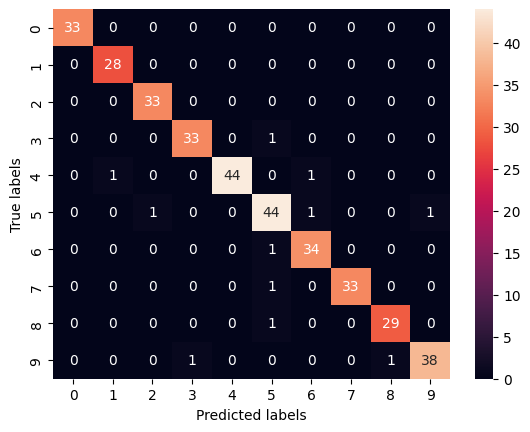

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

La mayoría de los dígitos están correctamente clasificados, como se refleja en los números altos en la diagonal, indicando verdaderos positivos. Hay algunas confusiones, como con los dígitos 8 y 9, aunque se dan en pocas ocasiones.

### ÁRBOL DE DECISIÓN
Creación y entrenamiento del modelo, con su correspondiente predicción.

In [12]:
decision_tree_classifier=tree.DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train,y_train)
y_pred=decision_tree_classifier.predict(X_test)

#### RENDIMIENTO

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



Las clases como la 6 tienen una alta precisión y recall,cosa que hace indicar un buen rendimiento y las clases como la 8 y la 9 son las peores. La exactitud general del 84%, hasta ahora es el peor de los modelos que hemos analizado.

#### MATRIZ DE CONFUSIÓN

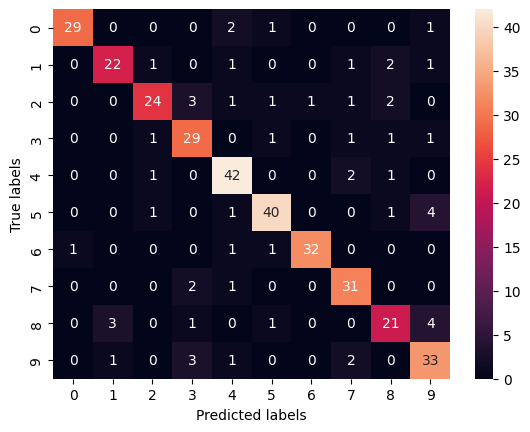

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

El informe de clasificación y la matriz de confusión reflejan un rendimiento vairado en la clasificación. Algunas clases como '0' y '6' exhiben alta precisión y recall, mientras que clases como '8' y '9' muestran unos valores más bajos, lo que se puede interpretar como confusiones con otras clases. Estos resultados, indican que este es el peor modelo para hacer predicciones de los empleados hasta ahora.


### RANDOM FOREST
Creación y entrenamiento del modelo, con su correspondiente predicción.

In [15]:
random_forest_classifier=ensemble.RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train,y_train)
y_pred=random_forest_classifier.predict(X_test)

#### RENDIMIENTO

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



#### MATRIZ DE CONFUSIÓN

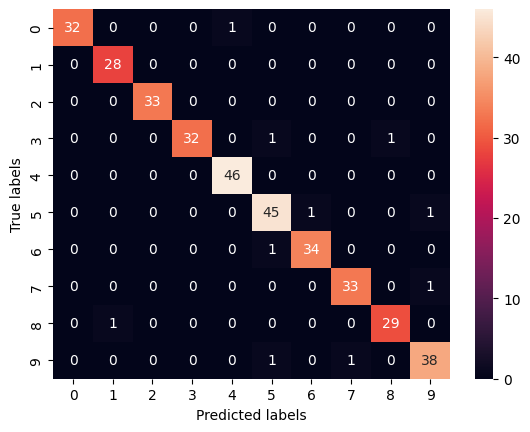

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

La precisión, el recall y el f1-score son altos para todas las clases, métricas que denotan un muy buen rendimiento. La matriz de confusión muestra que la mayoría de las predicciones caen en la diagonal principal (correctas), con muy pocos errores en otras clases. Este modelo es, junto con el regresor logístico es el mejor para predecir estos datos.

## DIFICULTAD B
En este apartado, se realizará una comparación del rendimiento de los tres modelos anteriores utilizando el conjunto de datos completo del repositorio UCI Machine Learning. En primer lugar, comprobaremos si los resultados del ejercicio 1 cambian cuando se aplican a nuevos datos que no se utilizaron ni en el entrenamiento ni en las pruebas. Luego, intentaremos mejorar los resultados volviendo a entrenar los modelos con nuevos conjuntos de entrenamiento, prueba y validación, utilizando el método de validación cruzada con k-fold con GridSearch para seleccionar los mejores parámeteros para cada modelo, y el mejor de ellos.

### CARGA DE DATOS DEL REPOSITORIO UCI ML
A continuación, todo el código Python necesario para cargar los datos del repositorio de UCI ML.

In [18]:
# pip install ucimlrepo

In [19]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
# print(optical_recognition_of_handwritten_digits.metadata)

# variable information
# print(optical_recognition_of_handwritten_digits.variables)

X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.2, random_state=42)

X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


Podemos observar que este conjunto de datos consta de 5620 muestras, cada una con 64 valores (píxeles de imagen 8x8)

### PERCEPTRON
Primero, comprobamos el rendimiento del perceptron declarado anteriormente con los datos nuevos de test.

In [20]:
y_pred=perceptron.predict(X_test)

/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


##### RENDIMIENTO

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.79      0.98      0.87       102
           2       0.95      0.94      0.95       107
           3       0.99      0.92      0.96       118
           4       0.97      0.93      0.95       117
           5       0.97      0.86      0.91        97
           6       0.98      0.98      0.98       123
           7       0.99      0.98      0.99       124
           8       0.91      0.89      0.90       105
           9       0.88      0.93      0.90       123

    accuracy                           0.94      1124
   macro avg       0.94      0.94      0.94      1124
weighted avg       0.94      0.94      0.94      1124



El informe de clasificación muestra un rendimiento general bueno del Perceptrón, con una precisión global del 94%. Sin embargo, hay algunas diferencias en el rendimiento entre las clases. La clase 1 tiene la precisión más baja (79%).Las clases 0, 3 y 7 tienen un rendimiento alto (99% de precision) y la clase 5 tiene el recall más bajo (86%)

##### MATRIZ DE CONFUSIÓN

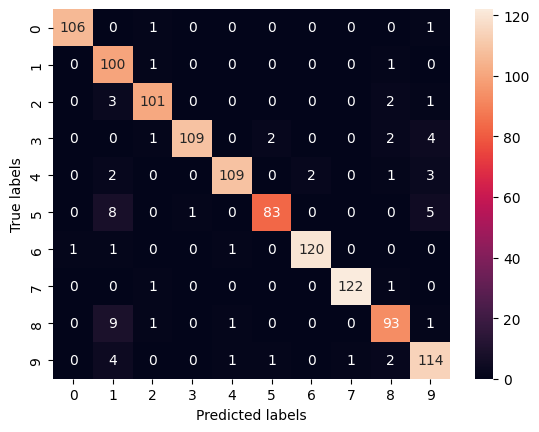

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### REENTRENAMIENTO DEL PERCEPTRON

In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_iter':[50, 500, 1000],'alpha':[1e-4,1e-5,1e-3,1e-2],'tol': (1e-3, 1e-1, 1e-5)}
grid = GridSearchCV(perceptron, parameters)
grid.fit(X_train, y_train)

# sorted(grid_search_CV.cv_results_.keys())
grid_y_pred=grid.predict(X_test)
print(grid.best_params_)

{'alpha': 0.0001, 'max_iter': 50, 'tol': 0.1}


Para realizar la mejora del perceptron hemos utilizado los parámetros:

+ Max_iter: El número máximo de iteraciones que el conjunto de entrenamiento es procesado por el algoritmo de aprendizaje.
+ Alpha: Es una constante que multiplica el ajuste al calcular el peso. $w_{j}:=w_{j}+\alpha(y-y_{pred})*x_{j}(for  every j)$ los pesos se ajustan basándose en la discrepancia entre la salida esperada y la obtenida. Si no hay diferencia, los pesos permanecen intactos. En caso contrario, se modifica el peso proporcionalmente a esta diferencia.
+ Tol: La tolerancia de pérdida, es un umbral que determina cuándo el algoritmo debe dejar de iterar. El proceso se detiene cuando la pérdida actual no es significativamente menor que la pérdida anterior. Una tolerancia alta significa que el algoritmo es menos estricto con los errores, mientras que una tolerancia baja puede llevar a un sobreajuste, donde el modelo se adapta excesivamente a los datos,

##### RENDIMIENTO

In [24]:
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.90      0.92      0.91       102
           2       0.98      0.98      0.98       107
           3       0.98      0.93      0.96       118
           4       0.97      0.97      0.97       117
           5       0.91      0.98      0.95        97
           6       0.96      0.97      0.96       123
           7       0.98      1.00      0.99       124
           8       0.90      0.92      0.91       105
           9       0.97      0.90      0.93       123

    accuracy                           0.96      1124
   macro avg       0.96      0.96      0.96      1124
weighted avg       0.96      0.96      0.96      1124



##### MATRIZ DE CONFUSIÓN

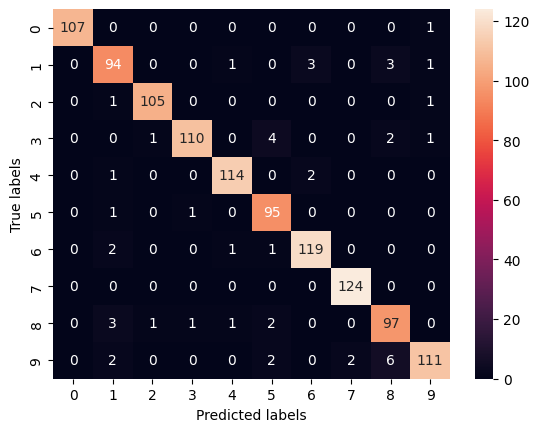

In [25]:
cm = confusion_matrix(y_test, grid_y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### RANDOM FOREST
Primero, se comprueba el rendimiento del bosque aleatorio declarado anteriormente con los datos nuevos de test.

In [26]:
y_pred=random_forest_classifier.predict(X_test)

/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


##### RENDIMIENTO

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.96      0.99      0.98       102
           2       1.00      0.98      0.99       107
           3       0.97      0.97      0.97       118
           4       0.99      0.96      0.97       117
           5       0.96      0.95      0.95        97
           6       0.98      0.98      0.98       123
           7       0.94      1.00      0.97       124
           8       0.98      0.95      0.97       105
           9       0.92      0.91      0.91       123

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124



##### MATRIZ DE CONFUSIÓN

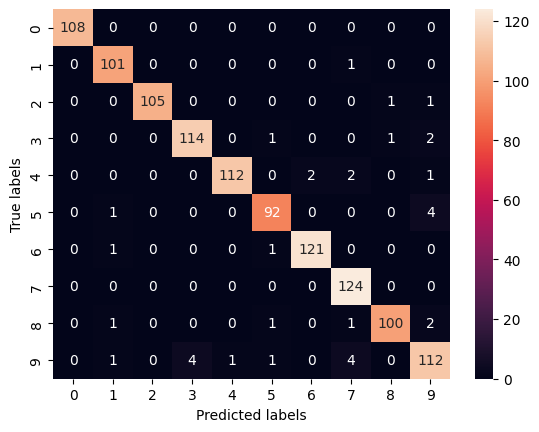

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### REENTRENAMIENTO DEL RANDOM FOREST

Para realizar la mejora del random  forest hemos utilizado los parámetros: 
+ n_estimators: Este parametro permite crear el numero de arboles que tendrá el bosque
+ criterion: La función que nos permite medir la calidad de la división. Este parametro tiene tres opciones: gini,entropy,log_loss.
+ max_depth: Este parametro simboliza la profundidad de los arboles.

In [29]:
parameters = {'n_estimators':[50, 100,150],'criterion':['gini','entropy','log_loss'],'max_depth':[None,1,3,5]}
grid = GridSearchCV(random_forest_classifier, parameters)
grid.fit(X_train, y_train)
#sorted(grid_search_CV.cv_results_.keys())
grid_y_pred=grid.predict(X_test)
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 150}


##### RENDIMIENTO

In [30]:
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.95      1.00      0.98       102
           2       1.00      0.99      1.00       107
           3       0.99      0.97      0.98       118
           4       0.98      0.98      0.98       117
           5       0.97      0.97      0.97        97
           6       0.98      0.98      0.98       123
           7       1.00      0.99      1.00       124
           8       0.96      0.99      0.98       105
           9       0.99      0.96      0.98       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



##### MATRIZ DE CONFUSIÓN

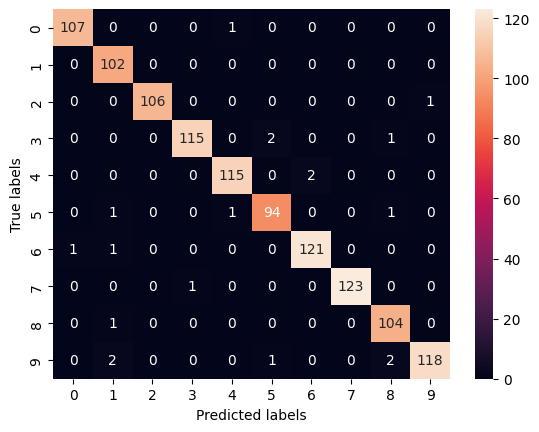

In [31]:
cm = confusion_matrix(y_test, grid_y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### REGRESIÓN LOGÍSTICA
Primero, se comprueba el rendimiento de la regresión logística declarada anteriormente con los datos nuevos de test.

In [32]:
y_pred=logistic_regression.predict(X_test)

/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


##### RENDIMIENTO

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       108
           1       0.93      0.95      0.94       102
           2       0.97      0.97      0.97       107
           3       0.96      0.97      0.96       118
           4       0.97      0.94      0.96       117
           5       0.96      0.92      0.94        97
           6       0.98      0.98      0.98       123
           7       0.97      0.98      0.98       124
           8       0.90      0.95      0.93       105
           9       0.94      0.93      0.94       123

    accuracy                           0.96      1124
   macro avg       0.96      0.96      0.96      1124
weighted avg       0.96      0.96      0.96      1124



##### MATRIZ DE CONFUSIÓN

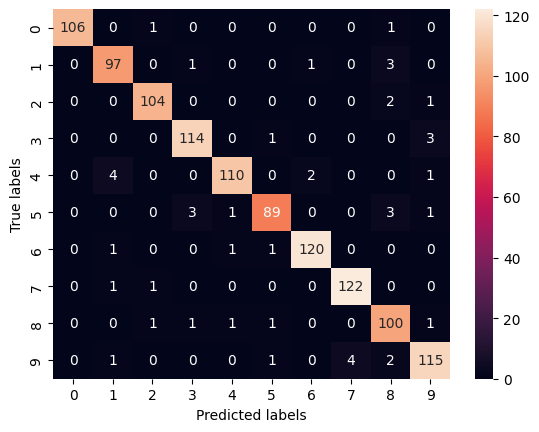

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### REENTRENAMIENTO DE LA REGRESIÓN LOGÍSTICA

Para realizar la mejora de la regresión logistica hemos utilizado los parámetros:
+ max_iter: El número máximo de iteraciones que el conjunto de entrenamiento es procesado por el algoritmo de aprendizaje.
+ C: Este parametro indica la fuerza de la regularizacion inversa,la regularización ayuda a prevenir el sobreajuste (overfitting) del modelo a los datos de entrenamiento.
+ tol: La tolerancia de pérdida, es un umbral que determina cuándo el algoritmo debe dejar de iterar. El proceso se detiene cuando la pérdida actual no es significativamente menor que la pérdida anterior. Una tolerancia alta significa que el algoritmo es menos estricto con los errores, mientras que una tolerancia baja puede llevar a un sobreajuste, donde el modelo se adapta excesivamente a los datos.

In [35]:
parameters = {'max_iter':[200,500],'C':[0.5,1],'tol': [1e-2,1e-1]}
grid = GridSearchCV(logistic_regression, parameters)
grid.fit(X_train, y_train)
#sorted(grid_search_CV.cvresults.keys())
grid_y_pred=grid.predict(X_test)
print(grid.best_params_)

/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{'C': 0.5, 'max_iter': 500, 'tol': 0.01}


/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### RENDIMIENTO

In [36]:
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.96      0.93      0.95       102
           2       0.98      0.99      0.99       107
           3       0.97      0.97      0.97       118
           4       0.98      0.97      0.97       117
           5       0.93      0.95      0.94        97
           6       1.00      0.95      0.97       123
           7       1.00      0.99      1.00       124
           8       0.93      0.97      0.95       105
           9       0.94      0.96      0.95       123

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124



##### MATRIZ DE CONFUSIÓN

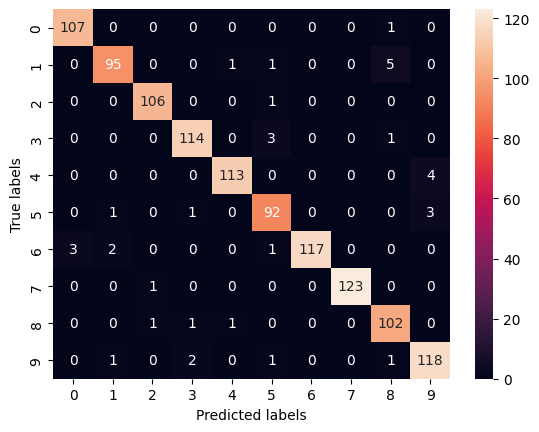

In [37]:
cm = confusion_matrix(y_test, grid_y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### ÁRBOL DE DECISIÓN
Primero, se comprueba el rendimiento del árbol de decisión declarado anteriormente con los datos nuevos de test.

In [38]:
y_pred=decision_tree_classifier.predict(X_test)

/Users/eduardobonninnarvaez/miniconda3/envs/ia2023/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


##### RENDIMIENTO

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.90      0.78      0.84       102
           2       0.86      0.91      0.88       107
           3       0.91      0.83      0.87       118
           4       0.85      0.80      0.82       117
           5       0.89      0.88      0.88        97
           6       0.91      0.95      0.93       123
           7       0.87      0.97      0.92       124
           8       0.79      0.77      0.78       105
           9       0.77      0.84      0.80       123

    accuracy                           0.87      1124
   macro avg       0.87      0.87      0.87      1124
weighted avg       0.87      0.87      0.87      1124



##### MATRIZ DE CONFUSIÓN

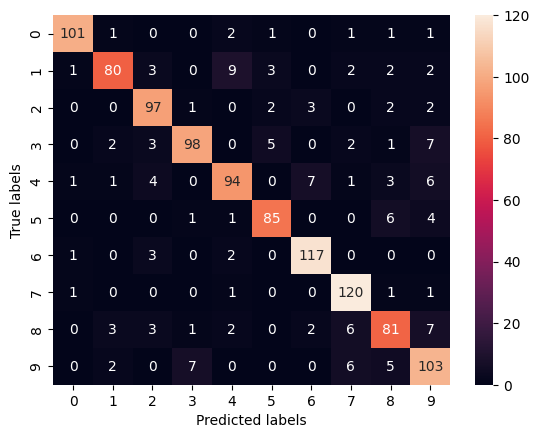

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### REENTRENAMIENTO DEL ÁRBOL DE DECISION

Para realizar la mejora del árbol de decisión hemos utilizado los parámetros:
+ min_samples_split: Este parametro nos indica el número minimo de muestras necesarias para dividir un nodo. En el caso de que el numero sea entero se considera que el numero de paramtero es el numero minimo, sino se realizara una multiplicacion con el numero de muestras para cada división
+ criterion: La función que nos permite medir la calidad de la división. Este parametro tiene tres opciones: gini,entropy,log_loss.
+ max_depth: Este parametro simboliza la profundidad de los arboles.

In [41]:
parameters = {'min_samples_split': [2,4,6],'criterion':['gini','entropy','log_loss'],'max_depth':[None,1,3,5]}
grid = GridSearchCV(decision_tree_classifier, parameters)
grid.fit(X_train, y_train)

#sorted(grid_search_CV.cv_results_.keys())
grid_y_pred=grid.predict(X_test)
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


##### RENDIMIENTO

In [42]:
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.87      0.89       102
           2       0.87      0.94      0.91       107
           3       0.86      0.92      0.89       118
           4       0.88      0.90      0.89       117
           5       0.93      0.87      0.90        97
           6       0.92      0.93      0.92       123
           7       0.94      0.94      0.94       124
           8       0.90      0.84      0.87       105
           9       0.90      0.88      0.89       123

    accuracy                           0.90      1124
   macro avg       0.90      0.90      0.90      1124
weighted avg       0.90      0.90      0.90      1124



##### MATRIZ DE CONFUSIÓN

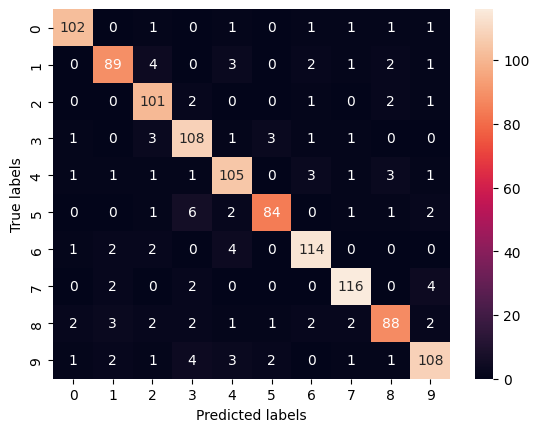

In [43]:
cm = confusion_matrix(y_test, grid_y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## CONCLUSIONES

Despues de realizar todo el analisis de los diferentes modelos, podemos llegar las siguientes conclusiones:
+ Mejora mediante Reentrenamiento: Todos los modelos muestran una mejora ligera en sus métricas después del reentrenamiento, mejora atribuible a la optimización de hiperparámetros-
+ El mejor modelo para predecir estos datos es el Random Forest, ya que sin la mejora, posee métricas tan buenas como el segundo mejor, el Regresor Logístico sin ser reentrenado.
+ El peor, con amplia diferencia, es el Árbol de Decisión, que, incluso con el reentrenamiento, posee métricas muy bajas en comparación al resto de modelos. Esto podría indicar una tendencia al overfitting de los datos de entrenamiento, o incapacidad para capturar la complejidad de las características.
+ El reentrenamiento del Regresor Logístico también muestra un progreso positivo, aunque como se ha mencionado anteriormente, no supera al modelo de Random Forest.
+ El Perceptrón ha mejorado después del reentrenamiento, pero sigue estando detrás de los mejores modelos como el Random Forest y Regresor Logístico en términos de precisión y recall.